# Importing Libraries



in this part we will install all the necessary libraries on command prompt and then import the necessary functions from those libraries. 

In [1]:
# importing all the necessary libraries



import pandas as pd







from numpy import mean



import numpy as np



import time







# step 1: preprocessing



from sklearn.impute import SimpleImputer # import some strategic imputer to fill in any missing values using mean



from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer # scale all the values to one range to avoid any biasness (this bias is seen in mostly naive bayes and knn etc)







from sklearn.impute import KNNImputer # import some strategic imputer to fill missing values using KNN (finds the nearest neighbour and fills it with that value)







from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif, VarianceThreshold, f_regression







from sklearn.decomposition import PCA



from sklearn.compose import ColumnTransformer



from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder



from sklearn.pipeline import Pipeline



from sklearn.linear_model import Ridge, Lasso







# step 2: data division



from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, ParameterGrid # to divide the code into train/test using a specific percentage or with/without replacement







# step 3: model



from sklearn.ensemble import GradientBoostingRegressor







# step 4: displaying accuracy



from sklearn.metrics import roc_auc_score, accuracy_score # to display the accuracy of our tree



from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer







# step 5: warning filter



import warnings



warnings.filterwarnings('ignore')

In [2]:
import sklearn



print(sklearn.__version__)

1.5.2


In [3]:
# pip install --upgrade scikit-learn

# Data Loading



data shall be loaded into variables as data sets using pandas and csv readers. they will be checked to see if they are loaded properly and will be loaded as 2 sets: train and test as per given in the kaggle data

In [4]:
# lets load the training data set



# train_data = pd.read_csv(r"/kaggle/input/challenge-2/train/train.csv")
train_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\train\train.csv")






# lets also check it by getting the first few rows of the data, there should be x1 - x78 and one target variable Y



train_data.head() 

,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43.0,27.0,4.0,Investment,Bibirevo,6407578.100,155572.0,0.189727,0.000070,9576.0,...,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,34.0,19.0,3.0,Investment,Nagatinskij Zaton,9589336.912,115352.0,0.372602,0.049637,6880.0,...,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,43.0,29.0,2.0,Investment,Tekstil'shhiki,4808269.831,101708.0,0.112560,0.118537,5879.0,...,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,77.0,77.0,4.0,Investment,Basmannoe,8398460.622,108171.0,0.015234,0.037316,5706.0,...,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
4,67.0,46.0,14.0,Investment,Nizhegorodskoe,7506452.020,43795.0,0.007670,0.486246,2418.0,...,62.0,14.0,1.0,53.0,78.0,1.0,20.0,113.0,17.0,9100000.0


In [5]:
# lets load the test data



# test_data = pd.read_csv(r"/kaggle/input/challenge-2/test/test.csv")
test_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\test\test.csv")




# check if the data has been loaded by getting the first 5 rows - there should be x1 - x78 and no target variable Y as this is test data



test_data.head() 

,row ID,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,Row3,89.0,50.0,9.0,Investment,Mitino,1.258354e+07,178473.0,0.194703,0.069753,...,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0
1,Row6,25.0,14.0,10.0,Investment,Sokol'niki,1.032047e+07,57405.0,0.523439,0.042307,...,144.0,81.0,16.0,3.0,38.0,80.0,1.0,27.0,127.0,8.0
2,Row11,38.0,19.0,11.0,Investment,Zapadnoe Degunino,7.632940e+06,78810.0,0.051844,0.437885,...,39.0,8.0,3.0,0.0,10.0,9.0,0.0,0.0,35.0,4.0
3,Row12,43.0,28.0,4.0,Investment,Kuncevo,5.235177e+07,142462.0,0.070662,0.035145,...,21.0,13.0,9.0,1.0,7.0,15.0,0.0,2.0,47.0,0.0
4,Row14,31.0,21.0,3.0,Investment,Lefortovo,8.993640e+06,89971.0,0.066941,0.306977,...,205.0,88.0,19.0,2.0,63.0,100.0,0.0,28.0,132.0,14.0


# Data Preprocessing



before we start processing this data and using algorithms, we will fix this data first, this is called data preprocessing

## split data into categorical and numerical



categorical will have one-hot and simple imputer of most frequent while numerical will have simple mean imputer and minmax scaler

In [6]:
categorical_cols = train_data.select_dtypes(include=["object"]).columns



numerical_cols = train_data.select_dtypes(exclude=["object"]).drop(columns=['price_doc']).columns

# Imputers

In [7]:
num_imputer = SimpleImputer(strategy="mean")

train_data[numerical_cols] = num_imputer.fit_transform(train_data[numerical_cols])

test_data[numerical_cols] = num_imputer.transform(test_data[numerical_cols])



cat_imputer = SimpleImputer(strategy="most_frequent")

train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])

test_data[categorical_cols] = cat_imputer.transform(test_data[categorical_cols])

# Scaler

In [8]:
scaler = MinMaxScaler()

train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# One hot

In [9]:
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align the test data with the training data columns

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)



# test_data = test_data.drop(columns=['price_doc'], errors="ignore")

## correlation matrix



i tried getting the correlation matrix but apparently a 2000 columns matrix is very computationally expensive as it performs pairs for all. so dont run it. it takes too long and then fails. i ran for 5 minutes. 

In [10]:
# # DONT RUN



# corr_matrix = train_data.corr()



# print(corr_matrix)

# variance

In [11]:
train_features = train_data.drop(columns=['price_doc'])
feature_variances = train_features.var(axis=0)

print(feature_variances.describe())

count    2199.000000
mean        0.007445
std         0.020317
min         0.000011
25%         0.000055
50%         0.000083
75%         0.000160
max         0.239073
dtype: float64


In [12]:
from sklearn.feature_selection import VarianceThreshold



selector = VarianceThreshold(threshold=0.001) 

train_features_reduced = selector.fit_transform(train_features)

print(train_features_reduced)

print(train_features_reduced.shape)



# test_features = selector.transform(test_data)

[[0.0080736  0.00361059 0.05194898 ... 0.         0.         0.        ]
 [0.00638378 0.00254079 0.03896173 ... 0.         0.         0.        ]
 [0.0080736  0.00387804 0.02597449 ... 0.         1.         0.        ]
 ...
 [0.00901239 0.00441294 0.03896173 ... 1.         0.         0.        ]
 [0.00901239 0.00441294 0.03896173 ... 1.         0.         0.        ]
 [0.00901239 0.00441294 0.03896173 ... 1.         0.         0.        ]]
(181507, 419)


# PCA



principal component analysis is applied

Cumulative explained variance:  [0.33608176 0.45078765 0.50827733 0.52889437 0.54472625 0.55902962
 0.57175488 0.58313326 0.59326414 0.60298062 0.61205016 0.62062444
 0.62865357 0.63590572 0.64246168 0.6485632  0.65446394 0.6601697
 0.6657632  0.67109076 0.67607886 0.68080734 0.68547704 0.68978843
 0.69398899 0.69811994 0.70221196 0.70610316 0.70981519 0.71342876
 0.71690307 0.72030681 0.72365901 0.72692964 0.73001386 0.73299357
 0.73580613 0.73848754 0.74107348 0.74357633 0.74597666 0.74826115
 0.75048746 0.75266683 0.7548272  0.75691283 0.75896818 0.76095917
 0.76289422 0.76473649 0.76652538 0.76828728 0.7700219  0.77167889
 0.77332254 0.77494689 0.77650594 0.77804545 0.7795347  0.78099808
 0.78241464 0.78381995 0.78521309 0.78658344 0.78794172 0.7892677
 0.79054433 0.79181731 0.79306954 0.7943066  0.79552865 0.79674463
 0.79793227 0.79911178 0.8002854  0.80144808 0.80259085 0.80372656
 0.80484071 0.80594526 0.80704415 0.80812555 0.80919725 0.8102672
 0.81131764 0.81235756 0.81338574

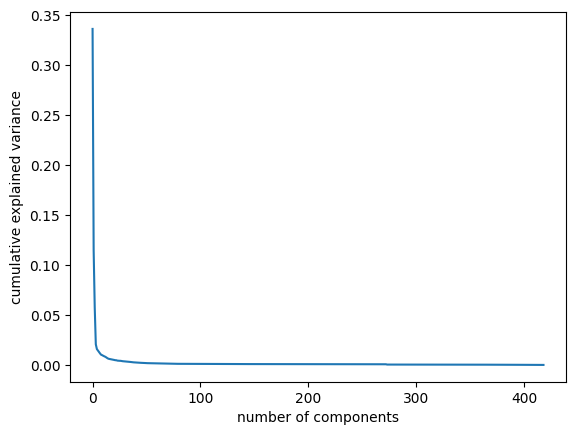

In [13]:
# plot an elbow graph to find the optimal number of components

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA



pca = PCA()

pca.fit(train_features_reduced)  # Fit PCA to your dataset



plt.plot(pca.explained_variance_ratio_)

plt.xlabel('number of components')

plt.ylabel('cumulative explained variance')

pca.explained_variance_ratio_.round(3)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print("Cumulative explained variance: ", cumulative_variance)

print(cumulative_variance)

In [14]:
print("Principal components shape:", pca.components_.shape)

print("Principal components:\n", pca.components_)



# Preserve the target variable

train_copy = train_data.copy()  # Backup original data

test_copy = test_data.copy()



# Separate target variable and features

train_features = train_data.drop(columns=['price_doc'])  # Features for PCA

train_target = train_data['price_doc']                  # Target variable



test_features = test_data.drop(columns=['price_doc'])    # Features for PCA



# Apply PCA transformation

pca = PCA(n_components=0.95)

train_features_pca = pca.fit_transform(train_features)  # Fit and transform train data

print("train transformed")

test_features_pca = pca.transform(test_features)        # Transform test data



print(train_features_pca.shape)

print(test_features_pca.shape)

Principal components shape: (419, 419)
Principal components:
 [[ 7.06535068e-02  6.25408221e-02  5.79405267e-02 ... -1.31263626e-03
  -2.19147000e-02  6.25967882e-03]
 [ 1.50205008e-02  1.86027231e-02  8.87599556e-03 ...  2.17734627e-01
  -1.19800109e-01 -1.96346713e-02]
 [ 3.48348101e-02  2.83256709e-02  3.36084394e-02 ... -9.76871684e-02
  -4.36420111e-02  7.33248157e-02]
 ...
 [-2.86253808e-03 -7.06966249e-04 -1.31744355e-03 ...  6.46859851e-03
  -3.69007701e-03 -3.00703469e-04]
 [ 1.06661518e-03  7.64414689e-04  1.54974009e-03 ... -8.08234561e-03
   8.43366002e-04  1.42446065e-03]
 [ 2.57974749e-03  1.22216094e-03  1.41024318e-03 ... -3.90738758e-05
   8.17832675e-04  5.88054279e-04]]


MemoryError: Unable to allocate 2.97 GiB for an array with shape (181507, 2199) and data type float64

In [ ]:
# Reconstruct train_data and test_data with PCA-transformed features and target variable

train_data = pd.DataFrame(train_features_pca)

train_data['price_doc'] = train_target.reset_index(drop=True)



test_data = pd.DataFrame(test_features_pca)

test_data['price_doc'] = test_copy['price_doc'].reset_index(drop=True)

print("train shape: ", train_data.shape)

print("test shape: ", test_data.shape)

## Data Splitting - festures and targets



the data in train_data set is of x1 - x78 columns (79 variables) and one target variable (Y). we must split that data so that we can perform data preprocessing on the features variables (will be referred to as X).

In [ ]:
# so in X, it is ALL the columns EXCEPT the last column known as 'Y' (we can confirm this using the train_data.head() we did earlier) so we must get all columns and DROP only the 'y' column



X = train_data.drop(columns=['price_doc'])



X # lets display X and see what it is now

,full_sq,life_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,...,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0.008074,0.003611,0.051949,0.021207,0.624792,0.220726,0.000134,0.493543,0.384615,0.536135,...,False,False,False,False,False,False,True,False,False,False
1,0.006384,0.002541,0.038962,0.036804,0.460577,0.435610,0.095115,0.352005,0.384615,0.401322,...,False,False,False,False,False,False,False,False,False,False
2,0.008074,0.003878,0.025974,0.013367,0.404870,0.130052,0.227141,0.299454,0.307692,0.319270,...,False,False,False,False,False,False,False,False,True,False
3,0.014457,0.010297,0.051949,0.030966,0.431258,0.015692,0.071506,0.290372,0.538462,0.347872,...,False,False,False,False,False,True,False,False,False,False
4,0.012580,0.006151,0.181821,0.026594,0.168416,0.006804,0.931742,0.117755,0.153846,0.124029,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181502,0.009012,0.004413,0.038962,0.306263,0.009811,0.686564,0.011151,0.008977,0.000000,0.009199,...,False,False,False,False,False,False,False,True,False,False
181503,0.009012,0.004413,0.038962,0.306263,0.009811,0.686564,0.011151,0.008977,0.000000,0.009199,...,False,False,False,False,False,False,False,True,False,False
181504,0.009012,0.004413,0.038962,0.306263,0.009811,0.686564,0.011151,0.008977,0.000000,0.009199,...,False,False,False,False,False,False,False,True,False,False
181505,0.009012,0.004413,0.038962,0.306263,0.009811,0.686564,0.011151,0.008977,0.000000,0.009199,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# so as per our X output, we can see that number of columns in train_data is 79 and number of columns in X is 78 meaning we have successfully performed our removal of target variable



# now to get the target variable alone, we can just get it alone,



Y = train_data['price_doc']



Y # lets see what it is



# as per our Y output, we can see it is of one column and 246k rows which means we have successfully extracted the target variable column

0          5850000.0
1          6000000.0
2          5700000.0
3         16331452.0
4          9100000.0
             ...    
181502     3480000.0
181503     3480000.0
181504     3480000.0
181505     3480000.0
181506     3480000.0
Name: price_doc, Length: 181507, dtype: float64

# Filters



there are two types of filters to filter out columns/features:



- variance filter (a column which has same values throughout the column like all are sunny)



- correlation filter (two columns which are same like weight in kg and weight in pounds)

In [ ]:
# print("X : ", X.shape)



# print("test data : ", test_data_processed.shape)

In [ ]:
# variance filter



# ----------------------------- case  -----------------------------



# variance_filter = VarianceThreshold(threshold=0.001)  # Adjust the threshold if needed



# X = variance_filter.fit_transform(X)



# test_data_processed = variance_filter.fit_transform(test_data_processed)



X.shape

(181507, 2199)

In [ ]:
# test_data_processed.shape

In [ ]:
# # correlation filter



# # ----------------------------- case  -----------------------------



# corr_matrix = pd.DataFrame(X).corr().abs()



# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))



# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]



# X = pd.DataFrame(X).drop(columns=to_drop)



# test_data_processed = pd.DataFrame(test_data_processed).drop(columns=to_drop)



X.shape

(181507, 2199)

In [ ]:
# test_data_processed.shape

## Data Splitting - train and validate



now our test_data set is of rows with NO target variable whereas the train_data set is WITH target variable.



our rules in machine learning is that we must train half or 70% of the data and then we must check its accuracy using the remaining half or 30% of the data - we can only check accuracy IF we have the answers i.e. the target variable. 



So, what we need to do is, is split the train_data set into 2, by a 70% and 30% ratio. we train the model using the 70% and then test the model using the 30% and then use that model to predict the test_data set.

In [ ]:
# holdout method



trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=2)

# functions



here we have defined functions like forward-backward selection, kbest selection & algorithm feature importance

In [ ]:
# forward backward selection



def fbselection(direction, sample_model, features, X, trainX, trainY, testX, test_data_processed):



    print("starting")



    selection = SequentialFeatureSelector(sample_model, direction=direction, n_features_to_select=features, scoring='roc_auc')



    return modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed)







def modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed):



    print("start extracting")



    trainX = selection.fit_transform(trainX, trainY)



    print("extracted, transforming")



    testX = selection.transform(testX)                                  # Ensure the test set is transformed similarly



    test_data_processed = selection.transform(test_data_processed)      # test data is also transformed



    X = selection.transform(X)                                          # full data transforming



    print("transformed")



    return sample_model, X, trainX, trainY, testX, test_data_processed







# kbest selection



def kbest(sample_model, features, X, trainX, trainY, testX, test_data_processed):



    print("starting")



    selection = SelectKBest(score_func=f_regression, k=features)



    return modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed)

In [ ]:
# feature importance function



def featureImportance(sample_model, features, X, trainX, trainY, testX, test_data_processed):



    print("fitting")



    



    # fit the model



    sample_model.fit(trainX, trainY)







    print("extracting features")







    # extract all the feature names from data



    importances = sample_model.feature_importances_



    feature_names = train_data.drop(columns=['Y']).columns



    print(feature_names)







    # sort with respect to importance



    feature_importance_df = pd.DataFrame({



        'Feature': feature_names,



        'Importance': importances



    }).sort_values(by='Importance', ascending=False)







    # extract the top ones



    top_features = feature_importance_df['Feature'].head(features).values



    print(top_features)







    # change all data according to the top ones we have selected



    trainX = pd.DataFrame(trainX, columns=feature_names)[top_features]



    testX = pd.DataFrame(testX, columns=feature_names)[top_features]



    X = pd.DataFrame(X, columns=feature_names)[top_features]



    test_data_processed = pd.DataFrame(test_data_processed, columns=feature_names)[top_features]







    print("features extracted")



    



    # retrain the model



    sample_model.fit(trainX, trainY)







    print("features trained")



    



    return sample_model, X, trainX, trainY, testX, test_data_processed

## model intialization



here model is intialized

In [ ]:
model = GradientBoostingRegressor(

    n_estimators=10,            # Number of boosting stages

    learning_rate=0.1,           # Learning rate shrinks contribution of each tree

    max_depth=1,                 # Maximum depth of individual regression estimators
    verbose=2
)

In [ ]:
print("X shape -> ", X.shape)



print("trainX shape -> ", trainX.shape)



print("testX shape -> ", testX.shape)



print("test_data_processed shape -> ", test_data.shape)

X shape ->  (181507, 2199)
trainX shape ->  (127054, 2199)
testX shape ->  (54453, 2199)
test_data_processed shape ->  (77789, 2199)


# feature selection



here we will apply feature selection and feature importance

In [ ]:
# from scipy.sparse import isspmatrix_csr



# for name, data in [("X", X), ("trainX", trainX), ("trainY", trainY), ("testX", testX), ("test_data", test_data)]:



#     assert not isspmatrix_csr(data), f"{name} is now a csr_matrix!"

In [ ]:
model

GradientBoostingRegressor(max_depth=1, n_estimators=10, verbose=2)

In [ ]:
# apply feature selection here



# model, X, trainX, trainY, testX, test_data = kbest(model, 200, X, trainX, trainY, testX, test_data)

In [ ]:
model

GradientBoostingRegressor(max_depth=1, n_estimators=10, verbose=2)

# grid search

In [ ]:
def gridsearch(param_grid, model, scorer, trainX, trainY):



    print("starting grid search")







    # intialize grid search



    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scorer, verbose=3, n_jobs=-1)



    print("grid search is intialized")







    # fit the model



    grid_search.fit(trainX, trainY)



    print("grid search fitting completed")







    # display the best model grid search found



    best_model = grid_search.best_estimator_



    print(best_model)







    # display the best parameters of the best model



    best_parameters = grid_search.best_params_



    print(best_parameters)







    # display the best score of the best model



    print("Best cross-validated score:", grid_search.best_score_)







    # assign the best model our model



    model = best_model



    print("model assigned, grid search completed")







    return model

In [ ]:
# Define a scoring metric (e.g., negative mean squared error)



# scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
# define hyper parameters of grid
# param_grid = {
#     'max_depth': [ 1, 2, 3, 4, 5 ]
# }

In [ ]:
# model = gridsearch(param_grid, model, scorer, trainX, trainY)

# sampling data



we do this when dataset is too big and model is too slow. this model took 10hours to just train on train data and then after 1 hour of predicting on testX, it failed. kernel crashed. hence this doesnt work on full data.     



However, we can achieve this model by taking 10% sample, train a model, predict, find its MSE. then repeat n times and pick the model with the smallest MSE. 

In [ ]:
print("X shape -> ", X.shape)



print("trainX shape -> ", trainX.shape)



print("testX shape -> ", testX.shape)



print("test_data_processed shape -> ", test_data.shape)

X shape ->  (181507, 2199)
trainX shape ->  (127054, 2199)
testX shape ->  (54453, 2199)
test_data_processed shape ->  (77789, 2199)


In [ ]:
model

GradientBoostingRegressor(max_depth=1, n_estimators=10, verbose=2)

In [ ]:
# trainX = preprocessor.fit_transform(trainX)



# print(trainX.shape)



# testX = preprocessor.transform(testX)



# print(testX.shape)



# test_data = preprocessor.transform(test_data)



# print(test_data.shape)



# X = preprocessor.transform(X)



# print(X.shape)

## model running



here we run the model

In [ ]:
from datetime import datetime

def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
# compute this predictions metrics
def metrics(y_pred, testY):
    print("starting to compute metrics")
    
    # display the mean squared error of this prediction
    mse = mean_squared_error(testY, y_pred)
    print("Mean squared error: %.2f" % mse, "   ")

    # display the root mean squared error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    print("Root Mean squared error: %.2f" % rmse, "   ")

    # display the mean absolute error of this prediction
    mae = mean_absolute_error(testY, y_pred)
    print("Mean absolute error: %.2f" % mae, "   ")

    # display the coeffeicient of determination of this preduction
    r2_Score = r2_score(testY, y_pred)
    print("Coefficient of determination: %.2f" % r2_Score, "    ")
    
    return rmse

In [ ]:
def run_model(model, trainX, trainY, testX, testY):
    print("training model", get_current_datetime())
    model.fit(trainX, trainY)
    print("computing score", get_current_datetime())
    print("model score: ", model.score(trainX, trainY))
    y_pred = model.predict(testX)
    rmse = metrics(y_pred, testY)
    return model, rmse

In [ ]:
def createFile(model, X, Y, test_data, file_name):
    print("fitting on X Y ", get_current_datetime())
    model.fit(X, Y)

    print("scoring on X Y ", get_current_datetime())
    score = model.score(X, Y)
    print("model test score: ", score, "    ")

    print("predicting on test ", get_current_datetime())
    test_prediction = model.predict(test_data)
    print(test_prediction)

    print("getting sample submission ", get_current_datetime())
    sample_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\sample_submission.csv")
    sample_data['price_doc'] = test_prediction

    print("Saving submission ", get_current_datetime())
    # Ensure the path ends with a backslash
    base_path = r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\\"
    full_path = base_path + file_name
    sample_data.to_csv(full_path, index=False)
    print(f"File saved at: {full_path}")

In [ ]:
def create_submission(model, trainX, trainY, testX, testY, X, Y, test_data, file_name):
    model, rmse = run_model(model, trainX, trainY, testX, testY)
    createFile(model, X, Y, test_data, file_name)

In [ ]:
# case 1
model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0, 
    verbose=3
)
# create_submission(model, trainX, trainY, testX, testY, X, Y, test_data, "gboost1.csv")
model

training model


      Iter       Train Loss   Remaining Time 
         1 417260213891434.1875           34.27m
         2 369840111698096.0625           31.72m
         3 332055715349561.8125           29.88m
         4 300663650352872.3125           29.58m
         5 275202934068021.6562           30.21m
         6 254537103244070.5000           29.72m
         7 237639523079425.8750           30.77m
         8 223920042166688.9375           35.49m
         9 212919297749147.0625           38.51m
        10 203817567228807.1875           39.09m
        11 196461558474252.7500           38.47m
        12 190347107637735.8750           38.15m
        13 185414145072771.4375           36.88m
        14 181363523245776.5312           39.96m
        15 178029992228278.0312           42.53m
        16 175197371806839.4375           45.72m
        17 172870915511266.8125           45.51m
        18 170971560554155.0312           45.06m
        19 169460699691423.8438           44.73m
        20 168161259508

GradientBoostingRegressor(verbose=3)

In [ ]:
# case 2
model2 = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.2,
    subsample=0.8, 
    verbose=3
)
# create_submission(model2, trainX, trainY, testX, testY, X, Y, test_data, "gboost2.csv")
model2

training model
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 365999362351523.4375 110180476965006.9375           24.02m
         2 295358264089993.3125 68221516781142.5000           27.62m
         3 250662945536926.0000 41270339571014.6250           23.26m
         4 223125927991383.3438 37637194421826.8750           21.84m
         5 204637678637925.4375 21338057136036.4688           20.62m
         6 190586753666549.6250 6651947967169.9375           19.47m
         7 181470387099912.9062 6904041745398.6875           18.08m
         8 175940906167994.1562 4433751849097.6562           16.96m
         9 172700250170685.9688 6929847623691.3438           16.46m
        10 170469150684255.0312 4437292025385.2188           15.69m
        11 167591090346502.9688 -2256838114276.8125           14.62m
        12 167312242239590.2500 5468985206942.4062           13.63m
        13 166511402766131.2188 1356548419183.7812           13.00m
        14 165453779740833.9375

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=50,
                          subsample=0.8, verbose=3)

In [ ]:
# case 3
model3 = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9, 
    verbose=3
)
# create_submission(model3, trainX, trainY, testX, testY, X, Y, test_data, "gboost3.csv")
model3

training model 2024-11-29 15:27:19
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 448057197755522.2500 28772646373981.8750          117.63m
         2 418567067084317.1250 8193202907111.4375          115.53m
         3 393693407904863.6250 23437064927914.8750          114.73m
         4 371066859609400.0625 19714703369495.2500          111.17m
         5 351093413423404.6250 19782097395847.7500          110.55m
         6 331699948244673.4375 7097626494866.8750          109.89m
         7 317248048440963.7500 33283268428635.0000          109.47m
         8 301273027889654.3125 5623429403792.1250          108.50m
         9 289693293536456.3750 31256003190699.7188          107.81m
        10 276196169373547.5312 140553931280.1562          107.39m
        11 264602292502792.9375 5121894844852.0625          106.54m
        12 254666111719861.6562 9688535327472.7500          106.59m
        13 245753672972660.2188 9122863960496.8438          107.20m
        14 23

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          subsample=0.9, verbose=3)

In [ ]:
# case 4
model4 = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.85, 
    verbose=3
)
# create_submission(model4, trainX, trainY, testX, testY, X, Y, test_data, "gboost4.csv")
model4

training model 2024-11-30 03:53:23
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 416342968544434.9375 58739078058702.1250           78.70m
         2 369101584499406.0000 54032859717715.7500           74.26m
         3 329865695726182.0000 38411202570735.0625           72.99m
         4 298631989138203.0625 34234489264370.4375           74.36m
         5 270887118878631.8750 14678769190846.0938           80.60m
         6 249408966669194.2812 17577674962506.1875           86.47m
         7 232756723349497.8750 19472436992004.9688           88.08m
         8 219682481194389.4688 18498883073754.5625           87.42m
         9 207771328572815.3750 7922439459402.3438           84.73m
        10 198336661046899.8750 8081509359593.1875           82.21m
        11 191189862591152.0938 10220571437570.3750           80.40m
        12 185693452183551.5000 10012249566659.0000           80.44m
        13 180390137195861.5625 3476361827060.3438           79.42m
        

GradientBoostingRegressor(max_depth=5, n_estimators=200, subsample=0.85,
                          verbose=3)

In [ ]:
# case 5
model5 = GradientBoostingRegressor(
    n_estimators=150,
    max_depth=2,
    learning_rate=0.15,
    subsample=0.7, 
    verbose=3
)
# create_submission(model5, trainX, trainY, testX, testY, X, Y, test_data, "gboost5.csv")
model5

training model 2024-11-30 08:15:34
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 391674381737947.0000 83982693880193.3125           21.58m
         2 331519296322948.1875 63792148216445.3750           20.80m
         3 288493817485173.0625 43470852980047.5000           19.69m
         4 254800169533682.6562 28563503432190.1875           19.64m
         5 231894587496561.5000 24704154299181.0000           19.47m
         6 214255946869590.7500 15349525443570.5000           19.56m
         7 202294219239062.9688 13445303792336.9688           19.32m
         8 193718874469511.7500 10533658903701.0312           19.12m
         9 185527634319538.0625 4969502251260.8750           18.83m
        10 180155764804268.4688 5493194212166.3125           18.70m
        11 176330388586895.5000 3143994046752.3125           18.53m
        12 174726278313033.7188 6293478769799.9062           18.31m
        13 173401709773363.9375 3530172440451.1250           18.14m
        14

GradientBoostingRegressor(learning_rate=0.15, max_depth=2, n_estimators=150,
                          subsample=0.7, verbose=3)

In [ ]:
# case 6
model6 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    max_features=0.3, 
    verbose=3
)
# create_submission(model6, trainX, trainY, testX, testY, X, Y, test_data, "gboost6.csv")
model6

training model 2024-11-30 09:03:00
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 416606719474225.6250 59340942445508.3125            9.95m
         2 368578128596613.2500 45991425667091.6250           10.73m
         3 331115728233254.8750 42390591718025.5625           10.77m
         4 299029945898600.4375 28226639681268.7500           10.45m
         5 272863118710473.5000 22534290616800.5000           10.13m
         6 252976277773712.3125 24404179026892.6875           10.00m
         7 236963698673299.4062 20611756974820.5938            9.89m
         8 221246229069376.2812 5921194557795.2500            9.94m
         9 211807740607060.7188 18157463694812.1875            9.87m
        10 202092383359369.3438 5307268238102.5312            9.74m
        11 194644344014018.5312 7356214204839.6875            9.65m
        12 188894316874911.3125 7349066289633.5938            9.48m
        13 184546852491100.2812 7623702559117.6875            9.34m
        14

GradientBoostingRegressor(max_depth=4, max_features=0.3, subsample=0.8,
                          verbose=3)

In [ ]:
# case 7
model7 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    min_samples_split=10, 
    verbose=3
)
# create_submission(model7, trainX, trainY, testX, testY, X, Y, test_data, "gboost7.csv")
model7

training model 2024-11-30 09:29:41
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 418293853596950.0625 57386184347058.1250           28.67m
         2 370298121324649.1875 41166538948244.9375           28.10m
         3 333028519915849.7500 43228611623806.0625           27.69m
         4 300765869078574.3750 23112438188629.2500           27.29m
         5 273370772163555.4062 7420192095236.4375           27.03m
         6 253994650257515.1875 33116377058948.7188           27.00m
         7 237252493229388.0938 17383851981048.3750           27.35m
         8 224868726981620.7812 27200315360222.1250           26.97m
         9 212805305004265.3750 2573212722593.3750           26.80m
        10 204632178389068.4688 17953149373776.0000           26.49m
        11 196456858023251.9062 1048093957168.2812           26.22m
        12 189618162331977.7500 -1472417147418.9375           25.88m
        13 186359662508011.6562 20513009704760.6875           25.53m
        

GradientBoostingRegressor(min_samples_split=10, subsample=0.9, verbose=3)

In [ ]:
# case 8
model8 = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.3,
    subsample=0.75, 
    verbose=3
)
# create_submission(model8, trainX, trainY, testX, testY, X, Y, test_data, "gboost8.csv")
model8

training model 2024-11-30 11:02:31
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 319672945709072.1250 155641872203797.9375            6.94m
         2 241007332733224.4062 75421993238061.0000            6.54m
         3 201665419159721.3125 32336951643526.8750            6.27m
         4 184302928598415.3125 26441984311197.7500            6.00m
         5 174168162940519.2500 10251233560059.9375            5.87m
         6 168053785482222.9062 3486092226887.6875            5.78m
         7 164620231892493.7500 955819193706.2500            5.65m
         8 164221564607071.1875 5323558462045.3750            5.50m
         9 161974477561490.2812 -3126805760937.9688            5.38m
        10 161880133762658.0625 2663268972278.4375            5.23m
        11 161817570401692.9375 2195778682298.5312            5.11m
        12 163529657524595.3750 6770614840658.3438            5.02m
        13 160691513474024.6250 -6959367247228.6562            4.88m
        14 

GradientBoostingRegressor(learning_rate=0.3, n_estimators=50, subsample=0.75,
                          verbose=3)

In [ ]:
# case 9
model9 = GradientBoostingRegressor(
    n_estimators=120,
    max_depth=4,
    learning_rate=0.08,
    subsample=0.85,
    max_features='sqrt', 
    verbose=3
)
create_submission(model9, trainX, trainY, testX, testY, X, Y, test_data, "gboost9.csv")
model9

training model 2024-11-30 11:21:34
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 428883498436573.5000 46084657957433.9375            1.06m
         2 389993582379650.2500 42583235312515.4375           58.19s
         3 357047097965571.1875 31668302067311.0000           54.25s
         4 331574197530453.3125 40263512908671.0000           50.97s
         5 306994954118300.7500 19393330020443.9375           50.45s
         6 286310203233441.8750 11259601191474.0625           49.58s
         7 267059783229098.9062 6913163598403.1250           48.40s
         8 255893884231347.4062 34506859078870.1562           48.86s
         9 241993846346599.0625 6331471676443.7812           47.88s
        10 231350615496067.5625 11956475951288.7500           46.92s
        11 222850283127468.7188 13113744379947.7812           46.32s
        12 215242342980613.4062 9598877510328.6250           45.85s
        13 207544906532237.9375 806645898588.6250           45.04s
        14

GradientBoostingRegressor(learning_rate=0.08, max_depth=4, max_features='sqrt',
                          n_estimators=120, subsample=0.85, verbose=3)

In [ ]:
# case 10
model0 = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6, 
    verbose=3
)
# create_submission(model0, trainX, trainY, testX, testY, X, Y, test_data, "gboost10.csv")
model0

training model 2024-11-30 15:32:14
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 414296134750212.8125 58754813350987.3750           56.55m
         2 375372114954886.3750 61498073138302.4375           79.39m
         3 330598651085364.2500 26815127808687.5625          107.01m
         4 300267141064852.6250 32597059697753.0000          126.61m
         5 271893013444197.7812 20939586746514.7188          139.22m
         6 253018622852596.1875 23561375091596.6562          151.22m
         7 236686404168175.5312 17552678493238.5312          156.41m
         8 224032165414793.9062 14567303715189.5625          157.58m
         9 213687834699794.9688 12252058894881.7188          166.05m
        10 203735339582044.3438 8026648605390.2500          165.12m
        11 194732332133147.8125 5093046256195.1875          156.99m
        12 189150124546738.7812 6751034507480.5000          153.53m
        13 186470747364783.1875 8342460397139.7188          146.25m
        1


KeyboardInterrupt



: 